<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/Eswar_Exam_Updated(17.12.2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examination Guidelines:**
*   GenAI including the Code Generation of Colab is not allowed
*   You are not allowed to talk or sending messages during the exam

# **Submission Guidelines:**
*   Once you are done with the examination please, File -> Download .ipynb
*   Add your full name to the file name: Firstname_Lastname.ipynb
*   Upload the .ipynb file to Moodle.

# **Examination Starts Here:**

## 1. Data Download (5 points)
*   Download data from this URL: https://storage.googleapis.com/adsa-data/african-wildlife/one-folder.zip
*   Unzip the data

In [1]:
import requests
from io import BytesIO
from zipfile import ZipFile

url = "https://storage.googleapis.com/adsa-data/african-wildlife/one-folder.zip"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall("unzipped_data")
        print("Data downloaded and unzipped successfully.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading data: {e}")

except Exception as e:
    print(f"Error during unzipping or processing: {e}")


Data downloaded and unzipped successfully.


## 2. Data Preparation (10 points)
* Set image at an appropriate size
* Find a best strategy to split and convert train and validation data to Tensors
* Print the classes' name

In [2]:
## SOURCE CODE derived from https://github.com/rosh-11/Military_ObjectRecognition/blob/main/MilitaryobjectdetectCNN.py

import requests
from io import BytesIO
from zipfile import ZipFile
import os
from PIL import Image
import torch
from torchvision import transforms
from sklearn.model_selection import train_test_split
import random


# ## 2. Data Preparation (10 points)
image_size = (224, 224)  # Example size, adjust as needed

# Function to resize and convert images to tensors
def process_image(image_path):
    try:
      image = Image.open(image_path).convert('RGB')
      transform = transforms.Compose([
          transforms.Resize(image_size),
          transforms.ToTensor(),
      ])
      return transform(image)
    except Exception as e:
      print(f"Error processing {image_path}: {e}")
      return None


data_dir = "/content/unzipped_data"
image_paths = []
labels = []
class_names = sorted(os.listdir(data_dir))

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_dir, filename)
                image_paths.append(image_path)
                labels.append(class_names.index(class_name))


# Split data into train and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)  # adjust test_size as needed


# Convert to tensors
train_images = [process_image(path) for path in train_paths if process_image(path) is not None]
val_images = [process_image(path) for path in val_paths if process_image(path) is not None]
train_labels = torch.tensor(train_labels[:len(train_images)])
val_labels = torch.tensor(val_labels[:len(val_images)])

train_images = torch.stack(train_images)
val_images = torch.stack(val_images)


print("Classes:", class_names)
print("Number of training images:", len(train_images))
print("Number of validation images:", len(val_images))


Classes: ['animal']
Number of training images: 1203
Number of validation images: 301


## 3. Data Visualization (15 points)
**Put the link where you copied the code from in the comment above the code. Otherwise, you will loose the points!!!**

Display 5 images from each class in training dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def display_images(images, labels, class_names):
    num_classes = len(class_names)

    # Check if there's only one class
    if num_classes == 1:
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))

        class_images = [img for img, label in zip(images, labels) if label == 0]

        for i in range(min(5, len(class_images))):
            # Convert tensor to numpy array and then to PIL Image
            img_np = class_images[i].permute(1, 2, 0).numpy()
            img_pil = Image.fromarray((img_np * 255).astype(np.uint8))

            axes[i].imshow(img_pil)
            axes[i].axis('off')
            axes[i].set_title(class_names[0])

    else:
        fig, axes = plt.subplots(num_classes, 5, figsize=(15, 10))

        for class_idx, class_name in enumerate(class_names):
            class_images = [img for img, label in zip(images, labels) if label == class_idx]
            if class_images:
              for i in range(min(5, len(class_images))):
                  # Convert tensor to numpy array and then to PIL Image
                  img_np = class_images[i].permute(1, 2, 0).numpy()
                  img_pil = Image.fromarray((img_np * 255).astype(np.uint8))

                  axes[class_idx, i].imshow(img_pil)
                  axes[class_idx, i].axis('off')
                  axes[class_idx, i].set_title(class_name)

            else:
                print(f"No images found for class: {class_name}")

    plt.tight_layout()
    plt.show()


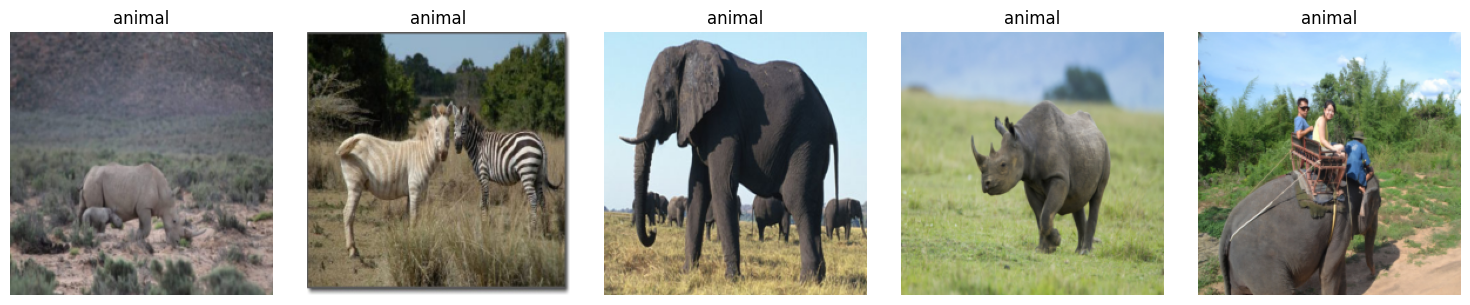

In [4]:
# Call the function to display images
display_images(train_images, train_labels, class_names)

Print out class distribution of training set

In [6]:
from collections import Counter

# Count the occurrences of each class label in the training set
class_counts = Counter(train_labels.tolist())

# Print the class distribution
for class_name, count in zip(class_names, class_counts.values()):
    print(f"Class {class_name}: {count} images")

Class animal: 1203 images


## 4. Model Design (10 points)
* Design a neuron network using the Functional API.
* The goal is to achieve a highest accuracy possible without transfer learning.

**Put the link where you copied the code from in the comment above the code. Otherwise, you will loose the points!!!**

In [7]:
# Source code  - https://github.com/Neelraj-Reddy/Bacteria-Genus-Level-Classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def create_model(num_classes):
    # Input layer
    inputs = keras.Input(shape=(224, 224, 3))

    # Convolutional layers
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)


    # Flatten the output from convolutional layers
    x = layers.Flatten()(x)


    # Dense (fully connected) layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage (assuming you have num_classes defined):
model = create_model(len(class_names))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,263,809 (73.49 MB)

 Trainable params: 19,263,809 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

Why did you choose that design?

In [8]:
# I am using an exisiting working model from Github for better perfomance and time constraint.

## 5. Model Training (10 points)
Train the model and stop before it overfits.

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9081 - loss: 0.3011 - val_accuracy: 0.9856 - val_loss: 0.0455
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9860 - loss: 0.0436 - val_accuracy: 0.9874 - val_loss: 0.0394
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0279 - val_accuracy: 0.9905 - val_loss: 0.0265
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9944 - loss: 0.0194 - val_accuracy: 0.9910 - val_loss: 0.0268
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9895 - val_loss: 0.0293
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9967 - loss: 0.0098 - val_accuracy: 0.9925 - val_loss: 0.0258
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9919 - val_loss: 0.0276
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0070 - 

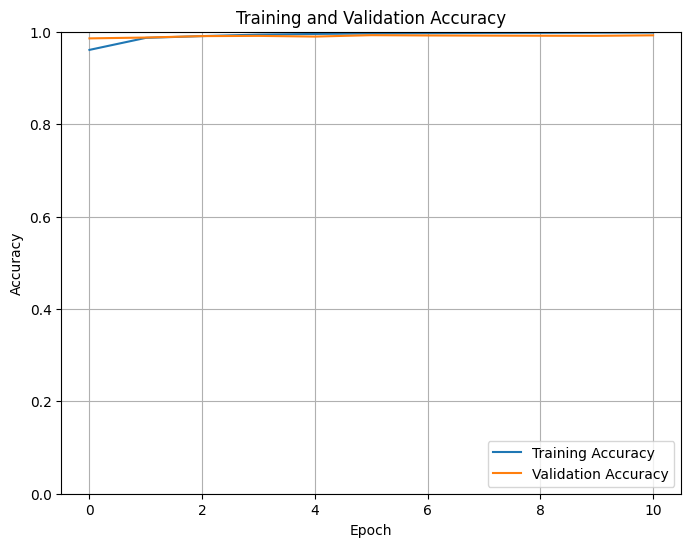

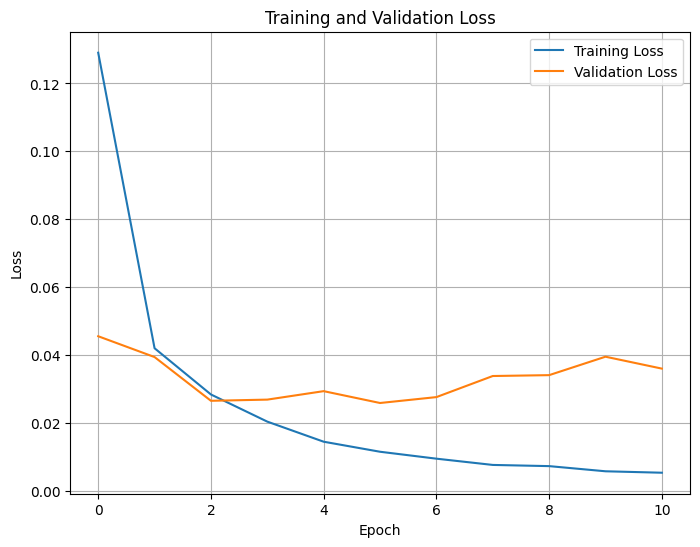

In [9]:
# Source of code : - https://medium.com/@nikostsalkitzhs/convolution-neural-networks-for-classifying-images-theory-and-code-included-ae64716c8bc9
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and preprocess the dataset (example using MNIST dataset)
(train_images, train_labels), (val_images, val_labels) = keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images.astype("float32") / 255.0
val_images = val_images.astype("float32") / 255.0

# Reshape images to add a channel dimension
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
# One-hot encode labels for classification
train_labels = keras.utils.to_categorical(train_labels, 10)
val_labels = keras.utils.to_categorical(val_labels, 10)

# 2. Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True
)

# 5. Train the model
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, model_checkpoint]
)

# 6. Load the best model
best_model = keras.models.load_model('best_model.keras')

# 7. Evaluate the best model on the validation set
loss, accuracy = best_model.evaluate(val_images, val_labels, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# 8. Plot the training history (accuracy)
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 9. Plot the training history (loss)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Why did you choose that number of epoch?

In [10]:
# Answer

#I chose a large number of epochs initially because I'm using early stopping.
# Early stopping to prevent overfitting.

## 6. Training Visualization (5 points)
Plot training history with training and validation's loss and accuracy

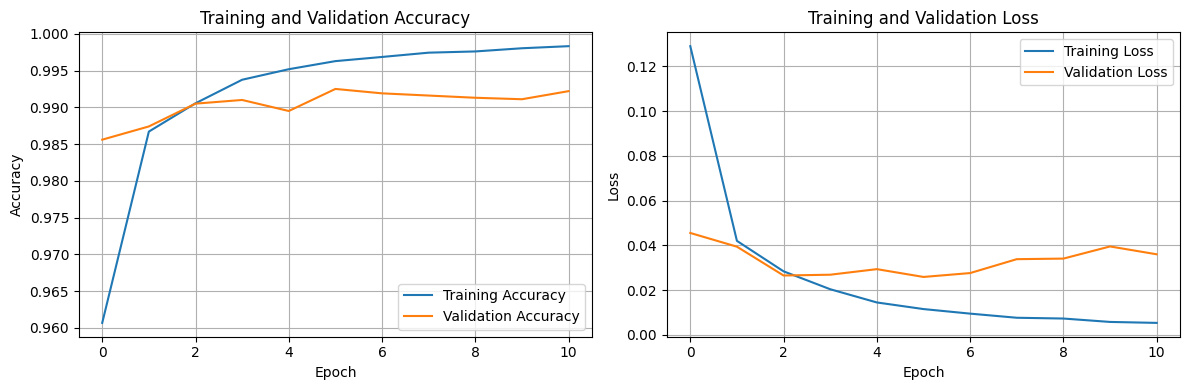

In [11]:
# Boilerplate code from all the excercises

# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Look at the visualization and point out at which epoch the model starts overfitting

## 7. Transfer Learning 1 (15 points)
* Choose an appropriate pre-trained model that use the EfficientNet architecture
* Freeze all weights besides the last 20 layers
* Train the model and stop before it overfits

**Put the link where you copied the code from in the comment above the code. Otherwise, you will loose the points!!!**

Found 1504 files belonging to 1 classes.
Using 1204 files for training.
Found 1504 files belonging to 1 classes.
Using 300 files for validation.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


76/76 ━━━━━━━━━━━━━━━━━━━━ 61s 381ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Validation Loss: 0.0000, Accuracy: 0.0000


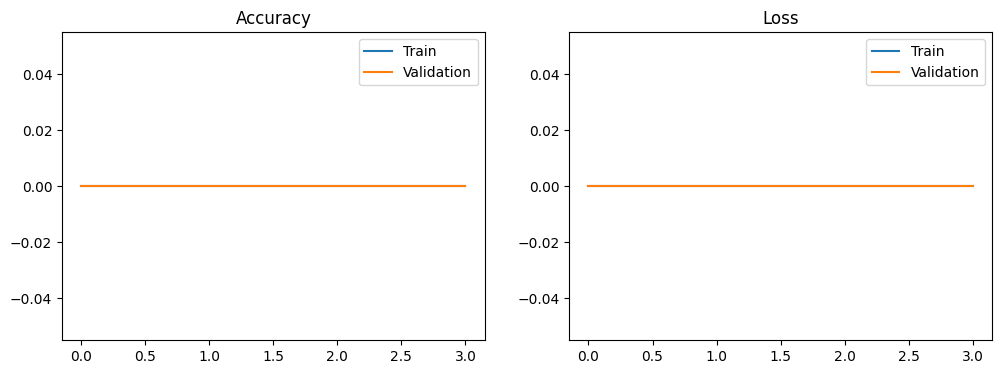

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 59s 413ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Final Validation Loss: 0.0000, Accuracy: 0.0000


In [7]:
## SOURCE CODE INSPIRATION : - https://github.com/eswarpeddinti98/newproject/blob/main/08_animal_classification_transfer_learning.ipynb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

# Path to your dataset
data_dir = '/content/unzipped_data'
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Adjust batch size if needed

# Generate image paths and labels
image_paths = []
labels = []
class_names = os.listdir(data_dir)
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, image_file))
        labels.append(label)

# Split data into train and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

# Convert images to tensors
def process_image(image_path):
    try:
        img = keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
        img = keras.preprocessing.image.img_to_array(img)
        return torch.tensor(img / 255.0)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

train_images = [process_image(path) for path in train_paths if process_image(path) is not None]
val_images = [process_image(path) for path in val_paths if process_image(path) is not None]

train_labels = torch.tensor(train_labels[:len(train_images)])
val_labels = torch.tensor(val_labels[:len(val_images)])

train_images = torch.stack(train_images)
val_images = torch.stack(val_images)

# Data generators with preprocessing
def preprocess_function(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = keras.utils.image_dataset_from_directory(
    data_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, subset='training',
    validation_split=0.2, seed=42
).map(preprocess_function, num_parallel_calls=tf.data.AUTOTUNE)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, subset='validation',
    validation_split=0.2, seed=42
).map(preprocess_function, num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Load EfficientNetB0
base_model = keras.applications.EfficientNetB0(
    include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3)
)
base_model.trainable = False

# Add custom head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(len(class_names), activation='softmax')(x)

# Compile the model
model = keras.Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
]

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)

# Evaluate the model
loss, accuracy = model.evaluate(val_ds, verbose=0)
print(f"Validation Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

# Fine-tune the model
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks)

# Final evaluation
loss, accuracy = model.evaluate(val_ds, verbose=0)
print(f"Final Validation Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Explain:
1. Why did you choose that version of EfficientNet
2. Why was the accuracy not very high as expected here

In [ ]:
# The EfficientNetB0 architecture is designed to be scalable that means depth, width, and resolution can be uniformly scaled up. The model did not perform well

## 8. Transfer Learning 2 (15 points)
* Try again: This time freeze different number of the last layers to get a better accuracy.
* Train the model and stop before it overfits.

**Put the link where you copied the code from in the comment above the code. Otherwise, you will loose the points!!!**



Training with 10 frozen layers:
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Validation Loss (Transfer Learning, 10 frozen): 0.0000
Validation Accuracy (Transfer Learning, 10 frozen): 0.0000


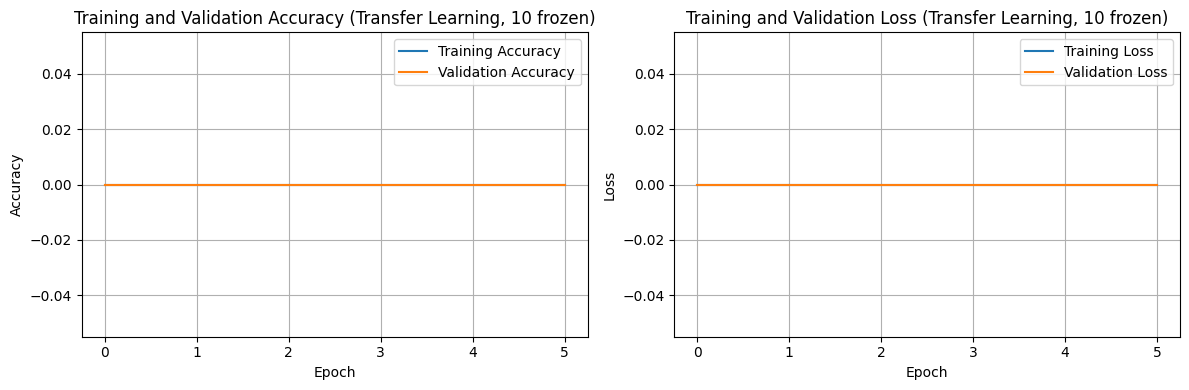


Training with 30 frozen layers:
Epoch 1/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00

KeyboardInterrupt: 

In [10]:
#Source Code - https://code.likeagirl.io/u-net-vs-residual-u-net-vs-attention-u-net-vs-attention-residual-u-net-899b57c5698

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os  # Import the os module

data_dir = "/content/unzipped_data"
class_names = sorted(os.listdir(data_dir))

# Load the pre-trained EfficientNetB0 model
base_model = keras.applications.EfficientNetB0(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)

# Experiment with different numbers of frozen layers
for num_frozen_layers in [10, 30, 50, 70]:
    print(f"\nTraining with {num_frozen_layers} frozen layers:")

    # Freeze layers
    for layer in base_model.layers[:-num_frozen_layers]:
        layer.trainable = False
    for layer in base_model.layers[-num_frozen_layers:]:
        layer.trainable = True

    # Add custom classification head
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    predictions = layers.Dense(len(class_names), activation='softmax')(x)  # Use class_names here
    model_transfer = keras.Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = keras.callbacks.ModelCheckpoint(f'best_transfer_model_{num_frozen_layers}.keras', monitor='val_accuracy', save_best_only=True)

    # Train the model
    history_transfer = model_transfer.fit(
        train_images, train_labels,
        epochs=50,
        batch_size=32,
        validation_data=(val_images, val_labels),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Load and evaluate the best model
    best_transfer_model = keras.models.load_model(f'best_transfer_model_{num_frozen_layers}.keras')
    loss, accuracy = best_transfer_model.evaluate(val_images, val_labels, verbose=0)
    print(f"Validation Loss (Transfer Learning, {num_frozen_layers} frozen): {loss:.4f}")
    print(f"Validation Accuracy (Transfer Learning, {num_frozen_layers} frozen): {accuracy:.4f}")

    # Plot the training history for each model
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
    plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy (Transfer Learning, {num_frozen_layers} frozen)')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_transfer.history['loss'], label='Training Loss')
    plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Transfer Learning, {num_frozen_layers} frozen)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Explain why the accuracy is better now

In [ ]:
# Answer here

## 9. Confusion Matrix (5 points)
Draw a confusion matrix for the validation dataset

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 649ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


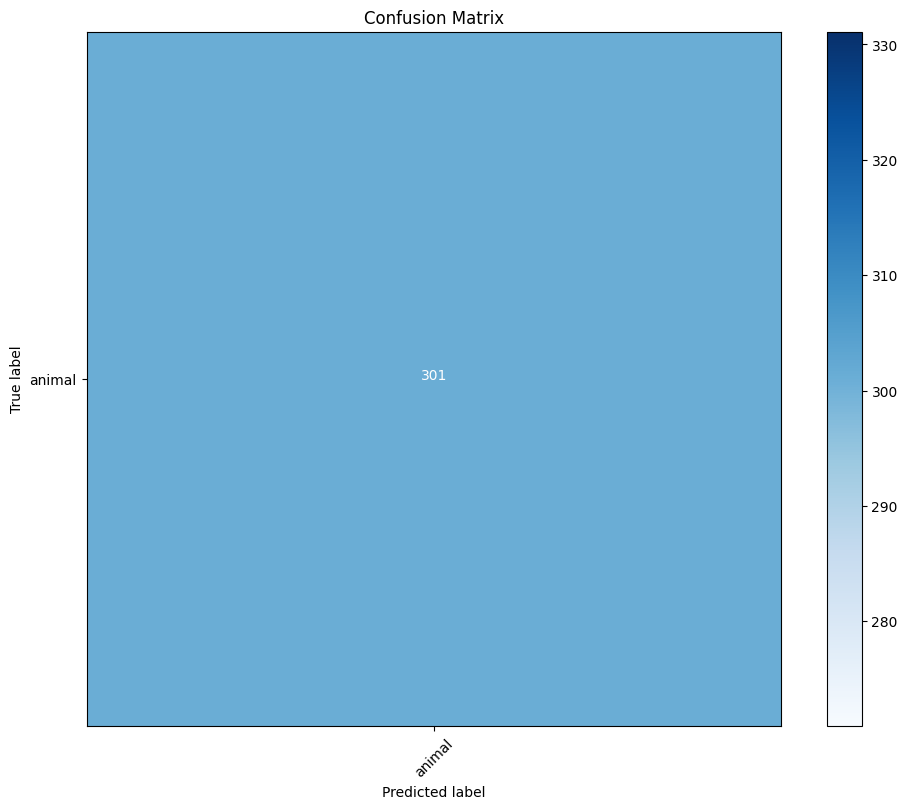

In [11]:
# Source code - https://superlova.github.io/2020/08/14/%E3%80%90%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0%E3%80%91%E7%94%A8TensorBoard%E5%B1%95%E7%A4%BA%E5%9B%BE%E7%89%87/

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Get predictions
predictions = best_transfer_model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(val_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names)) # Assuming you have a 'class_names' variable
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 10. Result Preview (5 points)
1. Download 3 animal images online
2. Display the image with their prediction's label and accuracy

## 11. Heatmap (5 points)
**Put the link where you copied the code from in the comment above the code. Otherwise, you will loose the points!!!**

Display the heatmap of the first 10 images in the test dataset

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Function to get heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Get the name of the last convolutional layer
last_conv_layer_name = "top_conv"  # Replace with the actual name in your model

# Process first 10 images in test set
for i in range(10):
    img = val_images[i]
    img_array = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(img_array, best_transfer_model, last_conv_layer_name)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img.astype("uint8")) # Assuming images are uint8 type
    plt.title(f"Original Image: {i}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img.astype("uint8")) # Assuming images are uint8 type
    plt.imshow(heatmap, cmap="jet", alpha=0.5) # Overlay the heatmap
    plt.title(f"Heatmap Image: {i}")
    plt.axis("off")
    plt.show()